# POTATO DISEASE DETECTION

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
potato-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

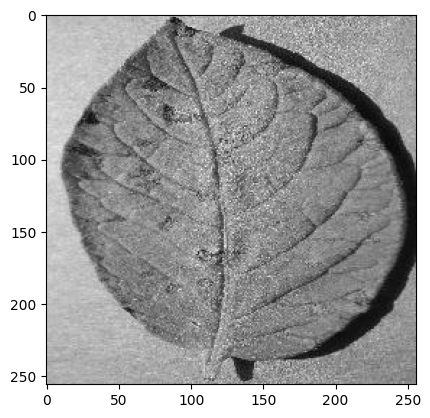

In [5]:
DATADIR = "/content/PotatoDisease"    #base dir
CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)      #constructing the path
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap = 'gray')
    plt.show()
    break
  break

In [6]:
print(img_array)

[[194 195 196 ... 150 137 157]
 [189 190 190 ... 152 173 151]
 [189 188 188 ... 151 181 151]
 ...
 [179 171 166 ... 141 138 130]
 [178 172 168 ... 142 132 131]
 [181 177 174 ... 148 138 146]]


In [7]:
img_array.shape

(256, 256)

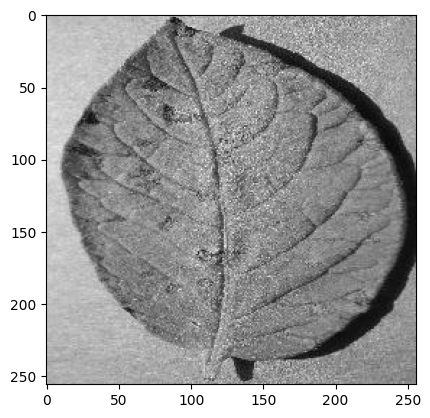

In [8]:
#GENERALIZING THE IMAGE SIZE FOR ALL IMAGES
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #every image now will be of 50 x 50
plt.imshow(new_array, cmap = 'gray')

In [9]:
# CREATING TRAINING DATA
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)      #path to cats or dogs directory
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   #resizing images
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [10]:
print(len(training_data))

2152


In [11]:
import random
random.shuffle(training_data)

In [12]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [14]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)    # last value '3' for 'color image'
y = np.array(y)

In [15]:
X = X/255

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size = (3,3), input_shape = X.shape[1:], activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2)),

    keras.layers.Flatten(),

    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
61/61 [==============================] - 360s 6s/step - loss: 1.0658 - accuracy: 0.6896 - val_loss: 0.6233 - val_accuracy: 0.8056
Epoch 2/10
61/61 [==============================] - 365s 6s/step - loss: 0.3537 - accuracy: 0.8796 - val_loss: 0.6804 - val_accuracy: 0.7454
Epoch 3/10
61/61 [==============================] - 356s 6s/step - loss: 0.2570 - accuracy: 0.9034 - val_loss: 0.4507 - val_accuracy: 0.8194
Epoch 4/10
61/61 [==============================] - 372s 6s/step - loss: 0.1540 - accuracy: 0.9432 - val_loss: 0.5413 - val_accuracy: 0.8472
Epoch 5/10
61/61 [==============================] - 370s 6s/step - loss: 0.0836 - accuracy: 0.9716 - val_loss: 0.5215 - val_accuracy: 0.8519
Epoch 6/10
61/61 [==============================] - 368s 6s/step - loss: 0.0573 - accuracy: 0.9814 - val_loss: 0.5146 - val_accuracy: 0.8519
Epoch 7/10
61/61 [==============================] - 379s 6s/step - loss: 0.0384 - accuracy: 0.9892 - val_loss: 0.9203 - val_accuracy: 0.8287
Epoch 8/10
61